In [2]:
%matplotlib inline

import os
import json
import time
import pickle
import requests


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
FEATURES  = [
    "flightcost",
    "flightduration",
    "drivingduration",
    "decision"
]

LABEL_MAP = {
    1: "yes",
    2: "no",
}

df = pd.read_csv("trainingDataForWorkshop.csv")

In [43]:
df.ix[:30]

,flightcost,flightduration,drivingduration,decision
0,128.1,352,72,yes
1,200.6,508,21,yes
2,156.6,587,68,yes
3,156.6,607,68,yes
4,252.6,620,22,yes
5,252.6,680,21,yes
6,252.6,740,21,yes
7,300.6,710,52,yes
8,452.6,567,52,yes
9,400.6,776,72,yes


In [4]:
for k,v in LABEL_MAP.items():
    df.ix[df.decision == k, 'decision'] = v

# Describe the dataset
print df.describe()

        flightcost  flightduration  drivingduration
count    30.000000       30.000000        30.000000
mean    598.350000      611.400000        55.000000
std     358.184689      170.484421        18.984567
min     128.100000      351.000000        21.000000
25%     313.100000      522.750000        52.000000
50%     630.350000      636.000000        57.000000
75%     801.100000      725.000000        72.000000
max    1586.600000      891.000000        72.000000


In [5]:
# Determine the shape of the data
print "{} instances with {} features\n".format(*df.shape)

# Determine the frequency of each class
print df.groupby('decision')['decision'].count()

30 instances with 4 features

decision
no     19
yes    11
Name: decision, dtype: int64


C:\Users\faye\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


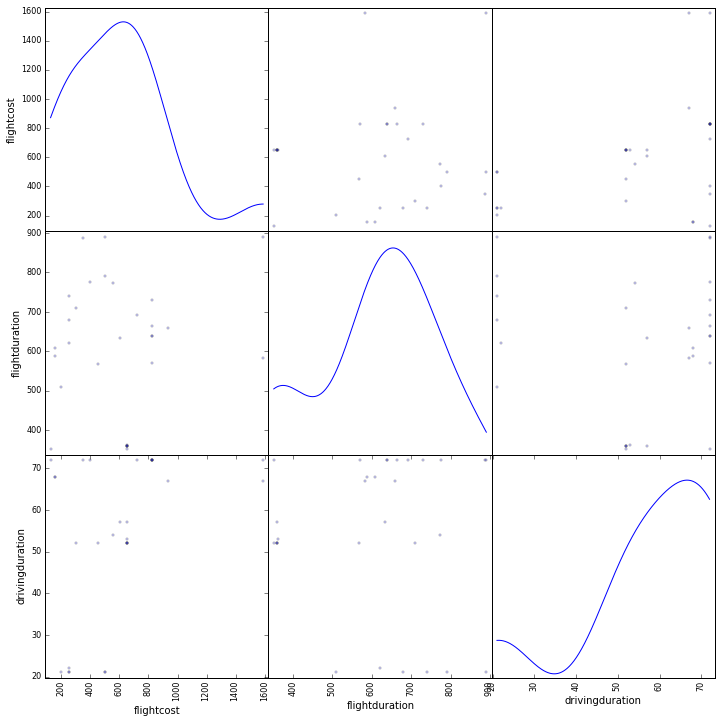

In [6]:
# Create a scatter matrix of the dataframe features
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

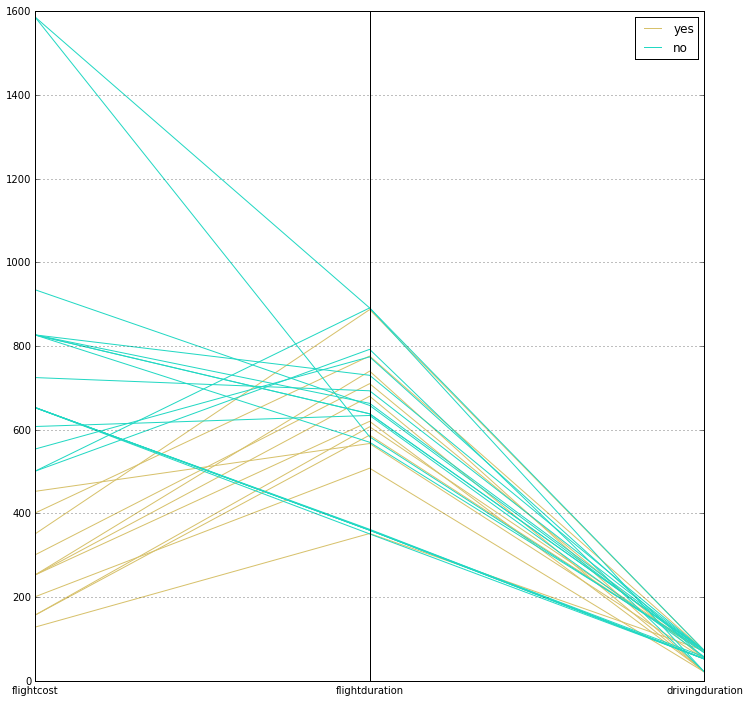

In [7]:
from pandas.tools.plotting import parallel_coordinates
plt.figure(figsize=(12,12))
parallel_coordinates(df, 'decision')
plt.show()

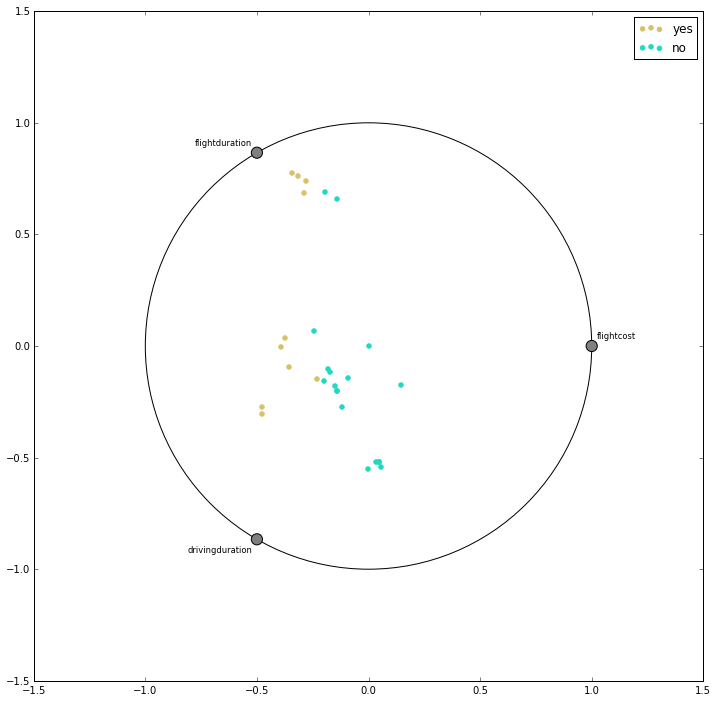

In [8]:
from pandas.tools.plotting import radviz
plt.figure(figsize=(12,12))
radviz(df, 'decision')
plt.show()

In [42]:
# Set some variables
number_flights = df.shape[0] 
number_accepted = len(df[df.decision == "yes"])

proportion_accepted = float(number_accepted) / number_flights
print 'The proportion of flights accepted is %s.' % proportion_accepted

The proportion of flights accepted is 0.366666666667.


In [9]:
cheapFlight = df[df.flightcost <= 400]
expensiveFlight = df[df.flightcost > 400]

proportion_cheapFlight_accepted = float(len(cheapFlight[cheapFlight.decision == "yes"])) / len(cheapFlight)
print 'The proportion of cheapFlight choosen is %s.' % proportion_cheapFlight_accepted

proportion_expensiveFlight_accepted = float(len(expensiveFlight[expensiveFlight.decision == "yes"])) / len(expensiveFlight)
print 'The proportion of expensiveFlight choosen is %s.' % proportion_expensiveFlight_accepted

The proportion of cheapFlight choosen is 1.0.
The proportion of expensiveFlight choosen is 0.0952380952381.


In [10]:
shortFlight = df[df.flightduration <= 600]
longFlight = df[df.flightduration > 600]

proportion_shortFlight_accepted = float(len(shortFlight[shortFlight.decision == "yes"])) / len(shortFlight)
print 'The proportion of fights accepted is %s.' % proportion_shortFlight_accepted

proportion_longFlight_accepted = float(len(longFlight[longFlight.decision == "yes"])) / len(longFlight)
print 'The proportion of men who accepted is %s.' % proportion_longFlight_accepted

The proportion of fights accepted is 0.333333333333.
The proportion of men who accepted is 0.388888888889.


In [11]:
from sklearn.linear_model import LogisticRegression

In [60]:
test = pd.read_csv("TestDataForWorkshop.csv") 

In [61]:
lr = LogisticRegression(random_state=1)

In [63]:
predictors = ["flightcost", "flightduration", "drivingduration"]
expected  = df["decision"]

# Train the algorithm using all the training data
lr.fit(df[predictors], expected)

# Make predictions using the training set -- where we already know the correct answers
predicted = lr.predict(df[predictors])

In [66]:
# Make predictions based on the test data
predictions = lr.predict(test[predictors])

test_predictions = pd.DataFrame({
        "FlightCost": test["flightcost"],
        "Decision": predictions
    })
test_predictions.head(20)

,Decision,FlightCost
0,yes,128.1
1,yes,200.6
2,yes,156.6
3,yes,156.6
4,yes,252.6
5,yes,252.6
6,yes,252.6
7,yes,300.6
8,yes,452.6
9,yes,400.6


In [67]:
predictions = lr.predict(test[predictors])

test_predictions = pd.DataFrame({
        "flightduration": test["flightduration"],
        "Decision": predictions
    })
test_predictions.head(20)

,Decision,flightduration
0,yes,352
1,yes,508
2,yes,587
3,yes,607
4,yes,620
5,yes,680
6,yes,740
7,yes,710
8,yes,567
9,yes,776


In [68]:
predictions = lr.predict(test[predictors])

test_predictions = pd.DataFrame({
        "drivingduration": test["drivingduration"],
        "Decision": predictions
    })
test_predictions.head(20)

,Decision,drivingduration
0,yes,72
1,yes,21
2,yes,68
3,yes,68
4,yes,22
5,yes,21
6,yes,21
7,yes,52
8,yes,52
9,yes,72


In [69]:
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

In [71]:
X = df[["flightcost", "flightduration","drivingduration"]]
y = df["decision"]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size = 0.2)
log_reg = lr.fit(X_train, y_train)

In [72]:
log_reg.score(X_test, y_test)

0.83333333333333337

In [73]:
from sklearn.metrics import classification_report

In [74]:
expected   = y_test
predicted  = log_reg.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=["yes","no"])
print classificationReport

             precision    recall  f1-score   support

        yes       1.00      0.67      0.80         3
         no       0.75      1.00      0.86         3

avg / total       0.88      0.83      0.83         6



In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf = RandomForestClassifier(n_estimators=50, oob_score=True) 

In [77]:
# Next split up the data with the 'train test split' method in the Cross Validation module
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# ...and then run the 'fit' method to build a forest of trees
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [78]:
rf.score(X_test, y_test)

0.83333333333333337

In [79]:
expected   = y_test
predicted  = rf.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=["yes","no"])
print classificationReport

             precision    recall  f1-score   support

        yes       0.80      1.00      0.89         4
         no       1.00      0.50      0.67         2

avg / total       0.87      0.83      0.81         6

